In [138]:
# - Install matplotlib and deap
# - Import all necessary libraries
!pip install matplotlib deap

In [139]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [140]:
# - Define the number of locations and vehicles

num_locations = 10 # Define the number of locations (eg 10)

locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
            # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50,50) # Define the coordinates for the depot

num_vehicles = 5 # Define the number of vehicles - (eg 3)

In [141]:
# - Genetic Algorithm Setup
# - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [142]:
# - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)#finish defining how to build an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)#finish defining how to build an population)

In [143]:
def evalVRP(individual):
    # - Write the fitness evaluation function
    # - Return (total distance, standard deviation)
    total_distance = 0
    distance = []
    for i in range(num_locations):
      vehicale_route = [depot] + [locations[individual[j]] for j in range(num_locations) if individual[j] == i]
      vehicle_distance = sum(np.linalg.norm(np.array(vehicale_route[i]) - np.array(vehicale_route[i+1])) for i in range(len(vehicale_route)-1))
      distance.append(vehicle_distance)
      total_distance += vehicle_distance
    return total_distance, np.std(distance)
# - Register the evaluate function in the toolbox
toolbox.register("evaluate", evalVRP)

In [144]:
# - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched) # Choose and configure a crossover method)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05) # Choose and configure a mutation method)
toolbox.register("select", tools.selTournament, tournsize=2)# Choose and configure a selection method)

In [145]:
#HINTS

#Select is simpler, try tournament selection or roulette selection. Look up how to add that.

#FOR mutation - mutShuffleIndexes

#For mate - cxPartialyMatched, cxOrdered

In [146]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    # - Write a function to visualize the routes - just plot the points and lines for each vehicle
    #individual colors for each vehical
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg   	min    
0  	300   	234.14	10.6514
1  	227   	234.14	10.6514
2  	215   	234.14	10.6514
3  	223   	234.14	10.6514
4  	242   	234.14	10.6514
5  	236   	234.14	10.6514
6  	216   	234.14	10.6514
7  	226   	234.14	10.6514
8  	238   	234.14	10.6514
9  	216   	234.14	10.6514
10 	239   	234.14	10.6514
11 	232   	234.14	10.6514
12 	245   	234.14	10.6514
13 	225   	234.14	10.6514
14 	216   	234.14	10.6514
15 	233   	234.14	10.6514
16 	219   	234.14	10.6514
17 	219   	234.14	10.6514
18 	215   	234.14	10.6514
19 	227   	234.14	10.6514
20 	215   	234.14	10.6514
21 	212   	234.14	10.6514
22 	228   	234.14	10.6514
23 	225   	234.14	10.6514
24 	227   	234.14	10.6514
25 	223   	234.14	10.6514
26 	223   	234.14	10.6514
27 	232   	234.14	10.6514
28 	222   	234.14	10.6514
29 	223   	234.14	10.6514
30 	217   	234.14	10.6514
Best Individual: [1, 0, 4, 9, 6, 5, 8, 2, 3, 7]
Best Fitness (total distance, standard deviation): (457.6295701925432, 10.651373848188873)


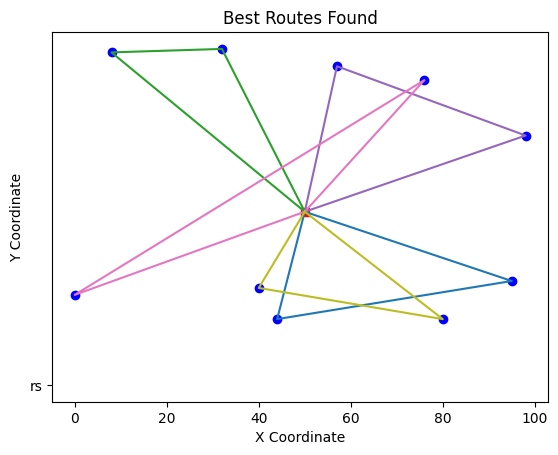

Statistics:


In [152]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html

    return pop, stats, hof

if __name__ == "__main__":
    # - Call the main function, run the algorithm and print the results
    pop, stats, hof = main()

    # Print the best individual found
    best_individual = hof[0]
    print("Best Individual:", best_individual)

    # Evaluate the best individual
    best_fitness = toolbox.evaluate(best_individual)
    print("Best Fitness (total distance, standard deviation):", best_fitness)

    # Plot the routes for the best individual
    plot_routes(best_individual, title="Best Routes Found")

    # Print the statistics
    print("Statistics:")
    print(stats)